In [1]:
import numpy as np
import matplotlib.pyplot as plt

We use Monte-Carlo integration to calculate the following integral: $$\int_0^1 e^x dx.$$ It's value is equal to 

In [2]:
true_value = np.e - 1
true_value

1.718281828459045

We calculate it once with independent draws, and once with antithetic draws

In [3]:
R = 100000

In [4]:
r_draws = np.random.uniform(size=R)
s_draws = np.random.uniform(size=R)

In [5]:
independent = (np.exp(r_draws) + np.exp(s_draws)) / 2
antithetic = (np.exp(r_draws) + np.exp(1 - r_draws)) / 2

We approximate the integral using both types of draws for increasing values of R, in order to illustrate the lower variance associated with the antithetic draws.

In [6]:
first = 100
all_r = range(first, R)
integral_independent = np.array([np.mean(independent[:r]) for r in all_r])
integral_antithetic = np.array([np.mean(antithetic[:r]) for r in all_r])

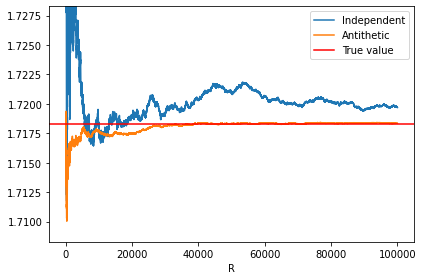

In [7]:
yrange = 0.01
plt.ylim([true_value - yrange, true_value + yrange])
plt.plot(all_r, integral_independent, label='Independent')
plt.plot(all_r, integral_antithetic, label='Antithetic')
plt.axhline(y=true_value, color='r', linestyle='-', label='True value')
plt.legend()
plt.xlabel('R')
plt.tight_layout()
plt.show()

We do the same for the following integral: $$\int_0^1 \left(x-\frac{1}{2}\right)^2 dx.$$
As explained in the lecture, the antithetic draws happen to have a slightly larger variance in this case.

In [8]:
true_value = 1 / 12
true_value

0.08333333333333333

In [9]:
r_draws = np.random.uniform(size=R)
s_draws = np.random.uniform(size=R)

In [10]:
independent = ((r_draws-0.5)**2 + (s_draws-0.5)**2) / 2
antithetic = ((r_draws-0.5)**2 + (1-r_draws-0.5)**2) / 2

In [11]:
first = 100
all_r = range(first, R)
integral_independent = np.array([np.mean(independent[:r]) for r in all_r])
integral_antithetic = np.array([np.mean(antithetic[:r]) for r in all_r])

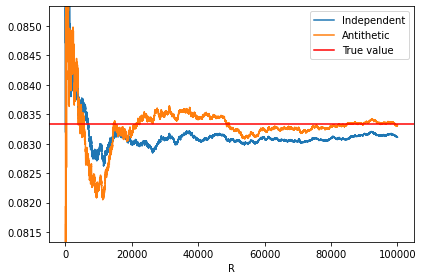

In [12]:
yrange = 0.002
plt.ylim([true_value - yrange, true_value + yrange])
plt.plot(all_r, integral_independent, label='Independent')
plt.plot(all_r, integral_antithetic, label='Antithetic')
plt.axhline(y=true_value, color='r', linestyle='-', label='True value')
plt.legend()
plt.xlabel('R')
plt.tight_layout()
plt.show()